In [5]:
# scientific libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# general libraries
import os  
import json
import time
import h5py as h5

# local libraries
from analysis import *
from general_utils import *
from hdf_utils import unpack_hdf
from scalebars import *

import balance_configs as configs
import experiments as exps
import analysis as ana

In [6]:
%matplotlib notebook
plt.rcParams.update({"figure.max_open_warning": 0})

In [7]:
# data_path = "/mnt/Data/NEURONoutput/sac_net/committee_runs/"
base_path = "/mnt/Data/NEURONoutput/sac_net/"

## TODO:
- enable parallel runs with saving to h5 along the way, as done with the sac-sac models
- update the synapses to enable poisson quantal input, as in the sac-sac model
- fill out notebook with figures and interactive displays

In [8]:
model_path = os.path.join(base_path, "model_runs")
save_name = "test"
# load_name = None
load_name = "test"

if load_name is None:
    from ei_balance_nogui import *
    os.makedirs(model_path, exist_ok=True)
    save_path = os.path.join(model_path, save_name) + ".h5"
    load_name = save_name
    exps.sacnet_run(
        save_path,
        configs.sac_mode_config(),
        n_nets=3,
        n_trials=3,
        rho_steps=[0.0, 1.0],
        pool_sz=8,
    )

t0 = time.time()
with h5.File(os.path.join(model_path, load_name) + ".h5", "r") as pckg:
    d = unpack_hdf(pckg)
print("data unpacked in %.1fs" % (time.time() - t0))
    
# deserialize parameter dicts
for i in d.keys():
    for rho in d[i].keys():
        d[i][rho]["params"] = json.loads(d[i][rho]["params"])
        
# rearrange hierarchy (rho condition above repeats)
rhos = list(d.keys())
idxs = list(d[rhos[0]].keys())

data unpacked in 0.4s


In [12]:
metrics = ana.get_sac_metrics(d)

dir_labels = d[rhos[0]][idxs[0]]["params"]["dir_labels"]
tuning = ana.analyze_tree(d, dir_labels, pref=0, thresh=-57)
sac_thetas = ana.get_sac_thetas(d)
sac_deltas = ana.get_sac_deltas(sac_thetas)

<IPython.core.display.Javascript object>


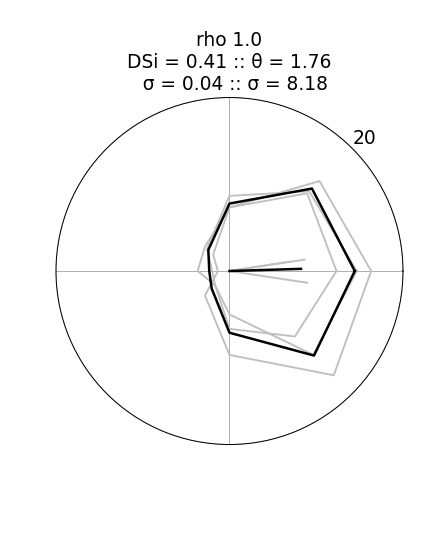

<IPython.core.display.Javascript object>


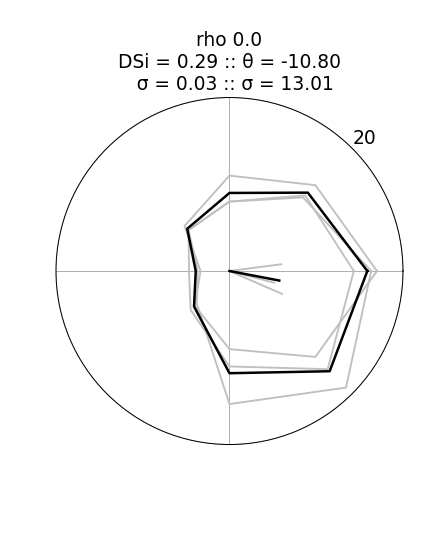

In [13]:
polars = sac_rho_polars(
    metrics,
    dir_labels,
    net_shadows=True,
    save=False,
)

In [ ]:
d[1.0][0]["dendrites"]["Vm"].shape